# Avacado Prices : Descriptive Analysis
---
### Pre-processing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # standard graphics
import seaborn as sns # fancier graphics

In [2]:
# Read the dataset
df = pd.read_csv('avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df = df.drop(columns='Unnamed: 0')
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
# check if there are any null values

df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
# 4046 - small
# 4225 - large
# 4770 - xl

In [9]:
df = df.rename(columns={'4046':'small', '4225': 'large', '4770':'xl'})
df.head()

,Date,AveragePrice,Total Volume,small,large,xl,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


---

# Descriptive Statistics

In [10]:
# Show the descriptive statistics using describe()     
df.describe()


,AveragePrice,Total Volume,small,large,xl,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
# What is the mean AveragePrice? (notice that there is a column of named 'AveragePrice')     

df['AveragePrice'].mean()


1.405978409775878

In [12]:
# Print the mean with two decimals only      

avgprice_mean = round(df['AveragePrice'].mean(), 2)
print(avgprice_mean)

1.41


In [13]:
# What is the standard deviation of Average Price?        
df['AveragePrice'].std()


0.40267655549555065

In [14]:
# Printing the standard deviation of Average Price with two decimals only     

avgprice_std = round(df['AveragePrice'].std(),2)
print(avgprice_std)

0.4


If we compare the `data.head()` and `data.describe()`, we notice that 'type' and 'region' columns were dropped out from the descriptive statistics table as they were text (or categorical data). However, we can study how many unique values these variables contain and the distribution of the values.

In [15]:
# What are the unique type values?         

df['type'].unique()



array(['conventional', 'organic'], dtype=object)

In [16]:
# How many rows i.e., observations there are for each type?         

df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [19]:
# Display the descriptive statistics grouped by 'type'         

df.groupby("type").describe()


AveragePrice                                                    \
                    count      mean       std   min   25%   50%   75%   max   
type                                                                          
conventional       9126.0  1.158040  0.263041  0.46  0.98  1.13  1.32  2.22   
organic            9123.0  1.653999  0.363502  0.44  1.42  1.63  1.87  3.25   

             Total Volume                ... XLarge Bags               year  \
                    count          mean  ...         75%        max   count   
type                                     ...                                  
conventional       9126.0  1.653213e+06  ...    2409.215  551693.65  9126.0   
organic            9123.0  4.781121e+04  ...       0.000     510.41  9123.0   

                                                                             
                     mean       std     min     25%     50%     75%     max  
type                                                                         
conventional  2016.147929  0.939968  2015.0  2015.0  2016.0  2017.0  2018.0  
organic       2016.147868  0.939961  2015.0  2015.0  2016.0  2017.0  2018.0  

[2 rows x 80 columns]

In [20]:
# Display the descriptive statistics for 'AveragePrice' grouped by 'type'               

df.groupby('type')['AveragePrice'].describe()



,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
conventional,9126.0,1.158040,0.263041,0.46,0.98,1.13,1.32,2.22
organic,9123.0,1.653999,0.363502,0.44,1.42,1.63,1.87,3.25


In [21]:
df_type = df.groupby('type')
df_type['Total Bags'].mean()

type
conventional    454390.130901
organic          24817.654696
Name: Total Bags, dtype: float64

In [22]:
# Compare the mean of AveragePrice between different types?              

df['AveragePrice'].groupby(df['type']).mean()



type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

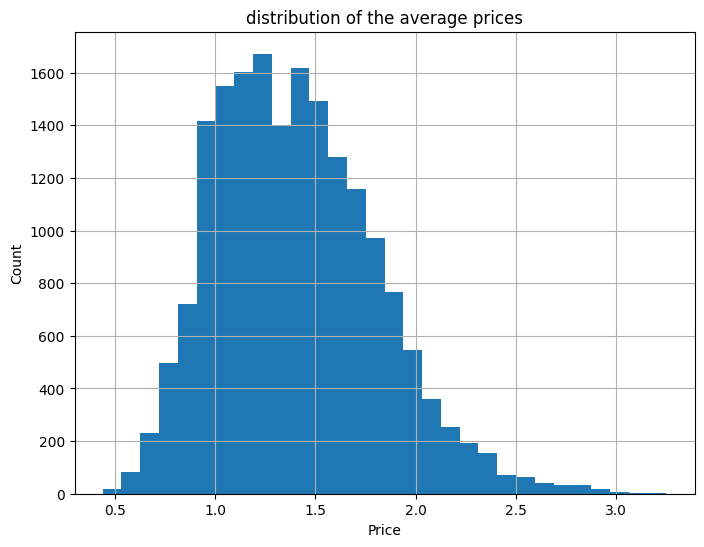

In [28]:
# Show the distribution of the average prices using Histogram? 

df.hist(column='AveragePrice',bins = 30, figsize = (8,6))
plt.xlabel("Price")
plt.ylabel('Count')
plt.title('distribution of the average prices')
plt.show()


/tmp/ipykernel_952/2274708792.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(df['AveragePrice'])


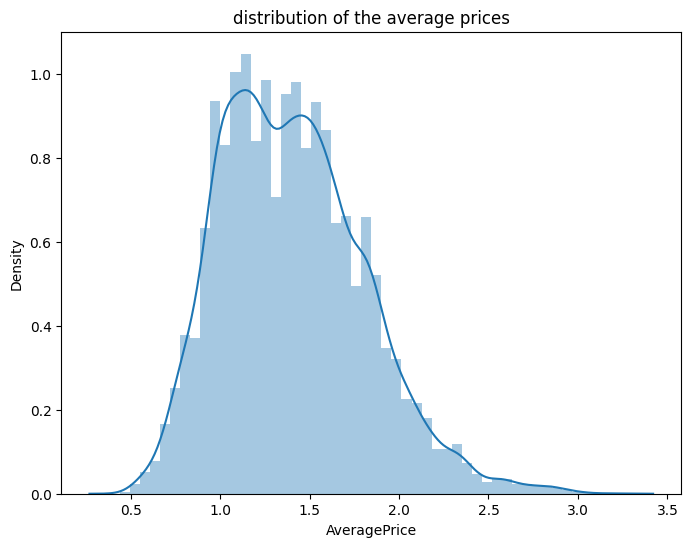

In [30]:
# Use a seaborn to create distribution plot of 'AveragePrice'             


plt.figure(figsize=(8,6))
plt.title('distribution of the average prices')
ax= sns.distplot(df['AveragePrice'])
plt.show()




If we observe the distribution closely, it seems that we have two peaks in our distribution. Could this be due to different avocado types?

/tmp/ipykernel_952/4220576090.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(df['AveragePrice'][df['type'] == 'conventional'], label = "conventional")
/tmp/ipykernel_952/4220576090.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(df['AveragePrice'][df['type'] == 'organic'], label

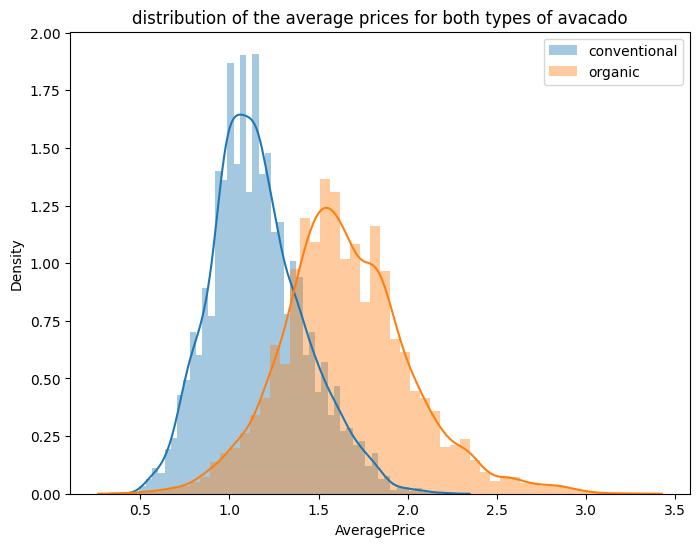

In [35]:
# Can we overlay the distribution of average price grouped by type?



plt.figure(figsize=(8,6))
plt.title('distribution of the average prices for both types of avacado')
ax= sns.distplot(df['AveragePrice'][df['type'] == 'conventional'], label = "conventional")
ax= sns.distplot(df['AveragePrice'][df['type'] == 'organic'], label = "organic")
plt.legend()
plt.show()

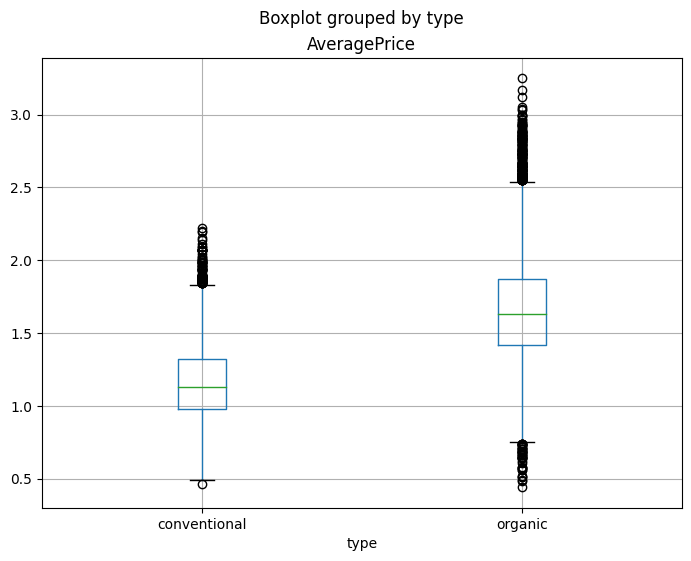

In [36]:
# Make a boxplot graph using pandas or seaborn to compare 'Avrage Price' by 'type'    


df.boxplot(column='AveragePrice', by = 'type', figsize = (8,6))
plt.show()



---